In [1]:
import os              
os.environ['PYTHONHASHSEED'] = '0'
import desc          
import pandas as pd                                                    
import numpy as np                                                     
import scanpy as sc                                                                                                                                     
import sys
import anndata
from scvi.dataset import PbmcDataset
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scvic.utils import entropy_batch_mixing

%matplotlib inline

seed = 1
random.seed(seed)
np.random.seed(seed)
tf.set_random_seed(seed)

/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/xiong/anaconda3/envs/DESC/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: Fut

In [2]:
save_path = "../Datasets/Biological Datasets"
pbmc_dataset = PbmcDataset(save_path=save_path, save_path_10X=os.path.join(save_path, "10X"))
pbmc_dataset.dense = True
pbmc_dataset.make_gene_names_lower()

[2022-09-19 07:44:53,393] INFO - scvi.dataset.dataset | File /data/xiong/scVIC/notebooks/Datasets/Biological Datasets/gene_info_pbmc.csv already downloaded
[2022-09-19 07:44:53,395] INFO - scvi.dataset.dataset | File /data/xiong/scVIC/notebooks/Datasets/Biological Datasets/pbmc_metadata.pickle already downloaded
[2022-09-19 07:44:53,427] INFO - scvi.dataset.dataset | File /data/xiong/scVIC/notebooks/Datasets/Biological Datasets/10X/pbmc8k/filtered_gene_bc_matrices.tar.gz already downloaded
[2022-09-19 07:44:53,428] INFO - scvi.dataset.dataset10X | Preprocessing dataset
[2022-09-19 07:45:08,356] INFO - scvi.dataset.dataset10X | Finished preprocessing dataset
[2022-09-19 07:45:08,436] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2022-09-19 07:45:08,438] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2022-09-19 07:45:08,633] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2022-09-19 07:45:08,684] INFO - scvi.dataset.dataset | Downsam

In [3]:
save_dir="result_pbmc"
                
adata = anndata.AnnData(X=pbmc_dataset.X)
labels_=pd.Series(pbmc_dataset.labels.squeeze(), index=adata.obs.index, dtype='category')
labels_.cat.categories=list(range(len(labels_.unique())))
batches_=pd.Series(pbmc_dataset.batch_indices.squeeze(), index=adata.obs.index, dtype='category')
batches_.cat.categories=list(range(len(batches_.unique())))
        
adata.obs["labels"]=labels_
adata.obs["batches"]=batches_
adata=desc.scale_bygroup(adata, groupby="batches")# if the the dataset has two or more batches you can use `adata=desc.scale(adata,groupby="BatchID")`

In [4]:
adata=desc.train(adata,
        dims=[adata.shape[1],64,32],
        tol=0.005,
        n_clusters=pbmc_dataset.n_labels,
        n_neighbors=10,
        batch_size=256,
        save_dir=str(save_dir),
        do_tsne=False,
        learning_rate=200, # the parameter of tsne
        use_GPU=False,
        num_Cores=1, #for reproducible, only use 1 cpu
        num_Cores_tsne=4,
        save_encoder_weights=False,
        save_encoder_step=3,# save_encoder_weights is False, this parameter is not used
        use_ae_weights=False,
        do_umap=False,
        random_seed=seed) #if do_uamp is False, it will don't compute umap coordiate

The number of cpu in your computer is 80
Create the directory:result_pbmc to save result
use_ae_weights=False, the program will rerun autoencoder
Pretraining the 1th layer...
learning rate = 0.1
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/50
11990/11990 [==============================] - 4s 354us/step - loss: 0.9024
Epoch 2/50
11990/11990 [==============================] - 4s 345us/step - loss: 0.8863
Epoch 3/50
11990/11990 [==============================] - 4s 341us/step - loss: 0.8657
Epoch 4/50
11990/11990 [==============================] - 4s 344us/step - loss: 0.8547
Epoch 5/50
11990/11990 [==============================] - 4s 348us/step - loss: 0.8488
Epoch 6/50
11990/11990 [==============================] - 4s 343us/step - loss: 0.8439
Epoch 7/50
11990/11990 [==============================] - 4s 345us/step - loss: 0.8389
Epoch 8/50
11990/11990 [==============================] - 4s 349us/step - loss: 0.8345
Epoch 9/50
11990/11990 [============

11990/11990 [==============================] - 0s 13us/step - loss: 0.3421
Epoch 48/50
11990/11990 [==============================] - 0s 12us/step - loss: 0.3400
Epoch 49/50
11990/11990 [==============================] - 0s 12us/step - loss: 0.3428
Epoch 50/50
11990/11990 [==============================] - 0s 12us/step - loss: 0.3438
learning rate = 0.001
Epoch 1/50
11990/11990 [==============================] - 0s 24us/step - loss: 0.3448
Epoch 2/50
11990/11990 [==============================] - 0s 13us/step - loss: 0.3466
Epoch 3/50
11990/11990 [==============================] - 0s 13us/step - loss: 0.3405
Epoch 4/50
11990/11990 [==============================] - 0s 13us/step - loss: 0.3398
Epoch 5/50
11990/11990 [==============================] - 0s 13us/step - loss: 0.3386
Epoch 6/50
11990/11990 [==============================] - 0s 12us/step - loss: 0.3454
Epoch 7/50
11990/11990 [==============================] - 0s 13us/step - loss: 0.3404
Epoch 8/50
11990/11990 [================

Epoch 8/50
11990/11990 [==============================] - 4s 294us/step - loss: 0.7796
Epoch 9/50
11990/11990 [==============================] - 4s 299us/step - loss: 0.7796
Epoch 10/50
11990/11990 [==============================] - 3s 287us/step - loss: 0.7796
Epoch 11/50
11990/11990 [==============================] - 3s 266us/step - loss: 0.7796
Epoch 12/50
11990/11990 [==============================] - 4s 303us/step - loss: 0.7796
Epoch 13/50
11990/11990 [==============================] - 4s 298us/step - loss: 0.7796
Epoch 14/50
11990/11990 [==============================] - 3s 281us/step - loss: 0.7796
Epoch 15/50
11990/11990 [==============================] - 3s 282us/step - loss: 0.7796
Epoch 16/50
11990/11990 [==============================] - 3s 282us/step - loss: 0.7796
Epoch 17/50
11990/11990 [==============================] - 3s 284us/step - loss: 0.7796
Epoch 18/50
11990/11990 [==============================] - 4s 303us/step - loss: 0.7796
Epoch 19/50
11990/11990 [=========

learning rate = 1e-05
Epoch 1/50
11990/11990 [==============================] - 4s 318us/step - loss: 0.7796
Epoch 2/50
11990/11990 [==============================] - 3s 283us/step - loss: 0.7796
Epoch 3/50
11990/11990 [==============================] - 4s 293us/step - loss: 0.7796
Epoch 4/50
11990/11990 [==============================] - 4s 301us/step - loss: 0.7796
Epoch 5/50
11990/11990 [==============================] - 3s 289us/step - loss: 0.7796
Epoch 6/50
11990/11990 [==============================] - 4s 294us/step - loss: 0.7796
Epoch 7/50
11990/11990 [==============================] - 4s 304us/step - loss: 0.7796
Epoch 8/50
11990/11990 [==============================] - 4s 300us/step - loss: 0.7796
Epoch 9/50
11990/11990 [==============================] - 4s 301us/step - loss: 0.7796
Epoch 10/50
11990/11990 [==============================] - 4s 305us/step - loss: 0.7796
Epoch 11/50
11990/11990 [==============================] - 4s 298us/step - loss: 0.7796
Epoch 12/50
11990/1

In [5]:
post_adata = anndata.AnnData(X=adata.obsm["X_Embeded_z1.0"])
post_adata.obsm["X_DESC"] = adata.obsm["X_Embeded_z1.0"]
post_adata.obs['cell_type'] = np.array([pbmc_dataset.cell_types[pbmc_dataset.labels[i][0]]  
                                        for i in range(post_adata.n_obs)])
post_adata.obs['batch'] = np.array([str(pbmc_dataset.batch_indices[i][0])
                                   for i in range(post_adata.n_obs)])
labels_pred=pd.Series(adata.obs["desc_1.0"], index=post_adata.obs.index, dtype='category')
labels_pred.cat.categories=list(range(len(adata.obs["desc_1.0"].unique())))
post_adata.obs['predicted_type'] = labels_pred
sc.pp.neighbors(post_adata, use_rep="X_DESC", n_neighbors=15)
sc.tl.tsne(post_adata, n_jobs=8)
show_plot = True

... storing 'cell_type' as categorical
... storing 'batch' as categorical


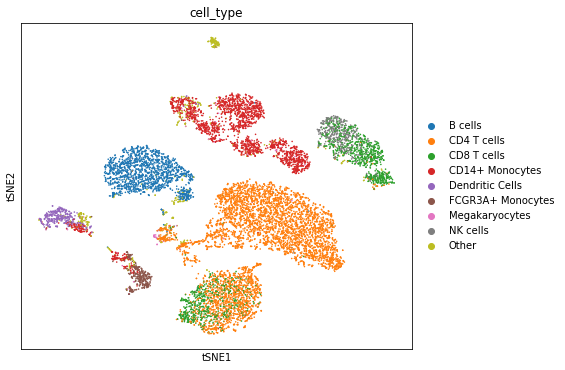

In [6]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.tsne(post_adata, color=["cell_type"], ax=ax, show=show_plot)

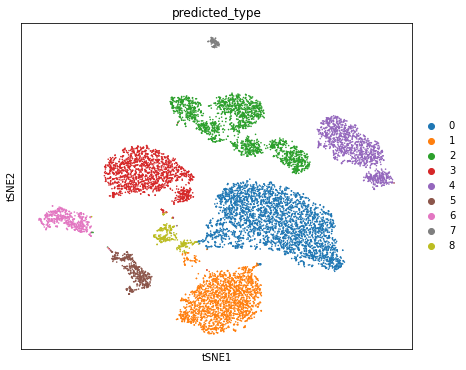

In [7]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.tsne(post_adata, color=["predicted_type"], ax=ax, show=show_plot)

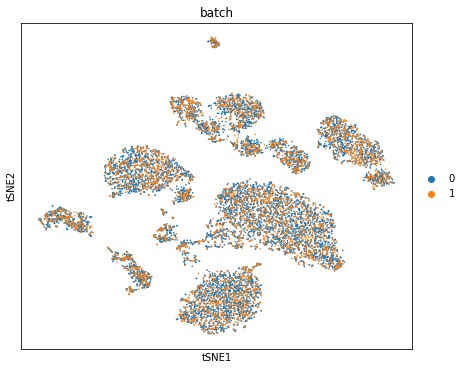

In [8]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.tsne(post_adata, color=["batch"], ax=ax, show=show_plot)

In [9]:
ARI = np.around(adjusted_rand_score(pbmc_dataset.labels.squeeze(), adata.obs["desc_1.0"]), 5)
NMI = np.around(normalized_mutual_info_score(pbmc_dataset.labels.squeeze(), adata.obs["desc_1.0"], average_method='arithmetic'), 5)
entropy_batch_mixing = np.around(entropy_batch_mixing(adata.obsm["X_Embeded_z1.0"], pbmc_dataset.batch_indices, pbmc_dataset.n_batches), 5)
print("ARI_DESC: ")
print(ARI)

print("NMI_DESC: ")
print(NMI)

print("BatchMixing_DESC: ")
print(entropy_batch_mixing)

ARI_DESC: 
0.63092
NMI_DESC: 
0.71718
BatchMixing_DESC: 
0.01201


In [12]:
saved_data = anndata.AnnData(X=adata.obsm["X_Embeded_z1.0"])
saved_data.obs['cell_type'] = post_adata.obs['cell_type']
saved_data.obs['predicted_type'] = post_adata.obs['predicted_type']
saved_data.obs['batch'] = post_adata.obs['batch']
saved_data.obsm["default_visualization"] = post_adata.obsm["X_tsne"]
saved_data.uns["ari"] = ARI
saved_data.uns["nmi"] = NMI
saved_data.uns["entropy_batch_mixing"] = entropy_batch_mixing
saved_data.uns["default_visualization_method"] = 'tsne'
saved_data.write_h5ad("../Saved_Data/DESC/PBMC_DESC.h5")